# Image Processing Assignment (A1)
**Roll Number: 21L-5464**  
**Name: Muhammad Ali**  
This notebook contains solutions for improving a given image using custom transformations.


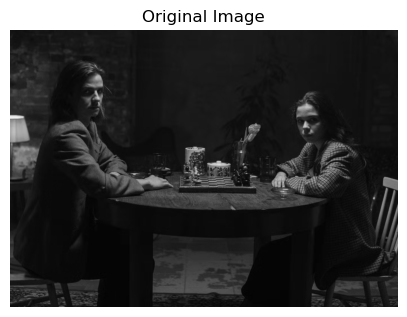

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load Image
def load_image(file_path):
    """Loads an image and converts it to grayscale."""
    image = imread(file_path)
    if image.ndim == 3:
        image = np.mean(image, axis=-1)  # Convert to grayscale if RGB
    return image / 255.0  # Normalize pixel values

# Display Image
def display_image(img, title="Image"):
    """Displays a grayscale image."""
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and display original image
image = load_image('img1gray.png')  # Replace with your image file
display_image(image, "Original Image")

In [12]:
# Contrast Adjustment (Transformation 1)
def contrast_adjustment(img, low=0.05, high=0.95):
    """Enhances contrast using Min-Max normalization."""
    min_val = np.percentile(img, low * 100)
    max_val = np.percentile(img, high * 100)
    
    img = (img - min_val) / (max_val - min_val)  # Normalize to [0,1]
    img = np.clip(img, 0, 1)  # Clip values outside range
    return img



In [6]:
# Edge Enhancement (Transformation 2)
def sharpen_image(img):
    """Sharpens the image using a simple Laplacian-like filter."""
    kernel = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])  # Sharpening Kernel
    
    padded_img = np.pad(img, pad_width=1, mode='edge')  # Padding to maintain size
    output = np.zeros_like(img)

    # Apply convolution manually
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = np.sum(padded_img[i:i+3, j:j+3] * kernel)

    return np.clip(output, 0, 1)



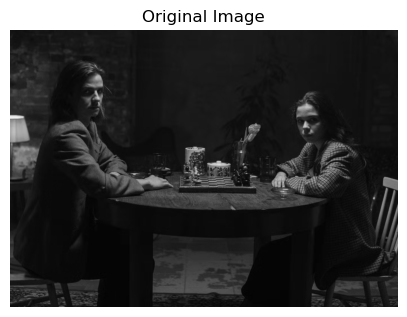

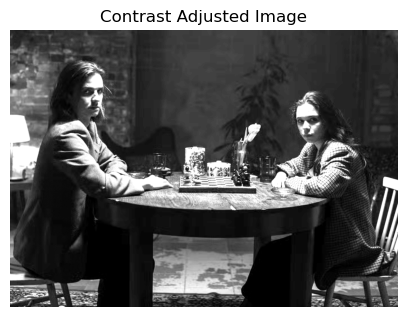

In [14]:
# Load and display original image
image = load_image('img1gray.png')  # Replace with your image file
display_image(image, "Original Image")

# Apply transformations
enhanced_image = contrast_adjustment(image)

# Display results
display_image(enhanced_image, "Contrast Adjusted Image")

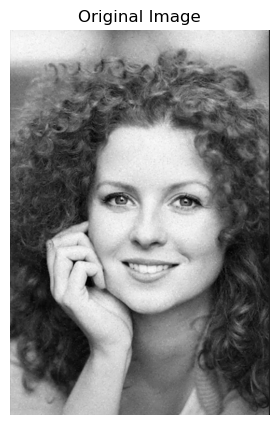

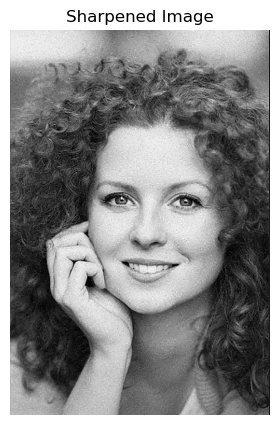

In [15]:
# Load and display original image
image = load_image('img2gray.jpg')  # Replace with your image file
display_image(image, "Original Image")

# Apply transformations
sharpened_image = sharpen_image(image)

# Display results
display_image(sharpened_image, "Sharpened Image")

## Explanation  

### Problems in the Original Image:  
1. The first image had poor contrast, making the details appear flat and less distinguishable. The dark and light areas were not well-separated, causing a lack of depth.  
2. The second image appeared slightly blurry, reducing the sharpness of fine details, especially in facial features and hair texture. The edges were not well-defined, making the image look softer than intended.  

### Applied Transformations:  
- **Contrast Enhancement**:  
  The contrast adjustment transformation was applied to the first image using Min-Max normalization. This improved the separation between light and dark regions, enhancing visibility and making details more prominent.  

- **Sharpening**:  
  A sharpening filter was applied to the second image using a Laplacian-like kernel. This helped enhance the edges, making the image appear crisper and improving the clarity of finer details.  

### Final Outcome:  
The first image, after contrast enhancement, appears more visually appealing, with improved tonal separation and restored details. The second image, after sharpening, looks much clearer, with enhanced edges and better definition. These transformations significantly improved the visual quality of both images, making them more detailed and aesthetically pleasing.  
